### Topic Suggestion
1. Fraud Detection in Financial Transactions: A Machine Learning Approach
2. Identifying Fraudulent Transactions: Predictive Modeling
3. Building an Intelligent Fraud Detection System
4. Data-Driven Approach for Transaction Anomaly Detection

## Project Preview
---

According to INTERPOL's (2024) assessment, regions such as West and Southern Africa have seen an increase in romance baiting frauds, while Asia has become a focal point for telecommunication frauds where perpetrators impersonate law enforcement or bank officials to extract financial information from victims.Among financial institutions, commercial banks and health insurers have been notably affected by fraud. Additionally, identity fraud has emerged as a predominant threat, accounting for 45% of all adverse contributions reported by banks and financial service providers in 2023, with projections suggesting it could reach 50% by the end of the year,(Retain Banker International, 2024). Interpol (2024) states that causes of fraud in commercial banks and financial institutions are multifaceted. The increased use of technology has enabled organized crime groups to conduct sophisticated fraud campaigns at relatively low costs. Moreover, PYMNTS (2024) indicates the rise in scam-related frauds, particularly those exploiting consumer trust through social engineering, has led to a 56% increase in such incidents in 2024, surpassing traditional digital payment crimes. Regarding transaction methods, scams have become the leading form of fraud, surpassing digital payment fraud. The share of scam-related fraud increased by 56% in 2024, with financial losses from scams rising by 121%. These scams now account for 23% of all fraudulent transactions, with relationship and product scams responsible for most losses,(PYMNTS,2024).

In Kenya, financial fraud has become an escalating concern, with recent incidents highlighting the vulnerability of the nation's financial institutions,(Kenay Wall Street,2024). A notable case involves Kiwipay Kenya Limited, where approximately Ksh2.3 billion ($19.48 million) was frozen due to suspicions of debit card fraud linked to an international syndicate. The CBK (2025) has identified several factors contributing to the rise of fraud within the country's financial sector. These include the increased adoption of information and communication technology (ICT), which, while enhancing operational efficiency, has also opened new avenues for cybercriminals. Additionally, a general lack of awareness regarding financial security among consumers has made them more susceptible to schemes such as social engineering and identity theft. Emerging cyber threats further exacerbate these challenges, necessitating robust cybersecurity measures across financial institutions. Among the various transaction methods, digital payment platforms have been significantly targeted by fraudsters. The CBK has observed that mobile and internet banking channels are particularly vulnerable, with fraudsters exploiting these platforms to conduct unauthorized transactions. This trend underscores the need for enhanced security protocols and increased consumer education to mitigate the risks associated with digital financial services.

## **Problem Statement**
---
The Central Bank of Kenya (CBK) has highlighted key risk factors, including the rapid adoption of digital financial services, low consumer awareness of financial security, and emerging cyber threats that continue to evolve. Furthermore, scam-related frauds, identity theft, and social engineering tactics have intensified, leading to substantial financial losses and undermining public trust in the financial sector. In response to these challenges, we aim to develop a robust fraud detection and prevention model that leverages advanced technologies such as machine learning, artificial intelligence, and real-time transaction monitoring. This model will enhance the ability of financial institutions to detect fraudulent activities proactively, mitigate risks, and strengthen cybersecurity measures.

## **Objectives**
---



## **Data Source and description**

The data was sourced from https://www.kaggle.com/datasets/marusagar/bank-transaction-fraud-detection

The dataset used for model building contained 200000 observations of 24 variables.

Here are the information of the columns:

* Customer_ID: A particular identifier for every customer within the bank's system.

* Customer_Name: The name of the consumer making the transaction.

* Gender: The gender of the consumer (e.G., Male, Female, Other).

* Age: The age of the consumer at the time of the transaction.

* State: The nation in which the patron resides.

* City: The metropolis wherein the client is living.

* Bank_Branch: The specific financial institution branch wherein the consumer holds their account.

* Account_Type: The kind of account held with the aid of the customer (e.G., Savings, Checking).

* Transaction_ID: A particular identifier for each transaction.

* Transaction_Date: The date on which the transaction passed off.

* Transaction_Time: The specific time the transaction became initiated.

* Transaction_Amount: The financial value of the transaction.

* Merchant_ID: A particular identifier for the merchant worried within the transaction.

* Transaction_Type: The nature of the transaction (e.G., Withdrawal, Deposit, Transfer).

* Merchant_Category: The class of the merchant (e.G., Retail, Online, Travel).

* Account_Balance: The balance of the customer's account after the transaction.

* Transaction_Device: The tool utilized by the consumer to perform the transaction (e.G., Mobile, Desktop).

* Transaction_Location: The geographical vicinity (e.G., latitude, longitude) of the transaction.

* Device_Type: The kind of device used for the transaction (e.G., Smartphone, Laptop).

* Is_Fraud: A binary indicator (1 or zero) indicating whether or not the transaction is fraudulent or now not.

* Transaction_Currency: The currency used for the transaction (e.G., USD, EUR).

* Customer_Contact: The contact variety of the client.

* Transaction_Description: A brief description of the transaction (e.G., buy, switch).

* Customer_Email: The e-mail cope with related to the consumer's account.**


## Import the packages

In [4]:
# This code will load the dataset from the provided zip file and perform initial data understanding.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')
import zipfile
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, RocCurveDisplay


!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

!pip install lightgbm
import lightgbm as lgb

In [5]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

!pip install lightgbm
import lightgbm as lgb

## Data Loading

In [6]:
# # Path the zip file
# zip_file_path = 'data/archive.zip'
# extracted_files_path = 'data'

# # Checking existence of the output directory
# os.makedirs(extracted_files_path, exist_ok=True)

# # Unzipping the archive file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extracted_files_path)

# print(f"Files extracted to {extracted_files_path}")

In [35]:

# Loading dataset to into dataframes
df= pd.read_csv('/content/Bank_Transaction_Fraud_Detection.csv')

# Display the first five rows of the dataframe
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0.0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0.0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0.0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0.0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0.0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


## Data Familiarization

In [36]:
# Checking the shape of the dataframe
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 138160 rows and 24 columns


In [37]:
# Checking for the column names
df.columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Transaction_Amount', 'Merchant_ID',
       'Transaction_Type', 'Merchant_Category', 'Account_Balance',
       'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud',
       'Transaction_Currency', 'Customer_Contact', 'Transaction_Description',
       'Customer_Email'],
      dtype='object')

In [38]:
# Extracting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138160 entries, 0 to 138159
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              138160 non-null  object 
 1   Customer_Name            138160 non-null  object 
 2   Gender                   138160 non-null  object 
 3   Age                      138160 non-null  int64  
 4   State                    138160 non-null  object 
 5   City                     138160 non-null  object 
 6   Bank_Branch              138160 non-null  object 
 7   Account_Type             138160 non-null  object 
 8   Transaction_ID           138160 non-null  object 
 9   Transaction_Date         138159 non-null  object 
 10  Transaction_Time         138159 non-null  object 
 11  Transaction_Amount       138159 non-null  float64
 12  Merchant_ID              138159 non-null  object 
 13  Transaction_Type         138159 non-null  object 
 14  Merc

In [39]:
# Checking for unique values per column
df.nunique()

,0
Customer_ID,138160
Customer_Name,108930
Gender,2
Age,53
State,34
City,145
Bank_Branch,145
Account_Type,3
Transaction_ID,138160
Transaction_Date,30


## Data Cleaning

In [12]:
# df= df.drop(["Customer_ID", "Customer_Name", "City", "Bank_Branch", "Transaction_ID", "Merchant_ID", "Transaction_Location", "Transaction_Currency", "Customer_Contact"], axis =1)
# df.head()

In [40]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
duplicates.info()

Duplicate Rows:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              0 non-null      object 
 1   Customer_Name            0 non-null      object 
 2   Gender                   0 non-null      object 
 3   Age                      0 non-null      int64  
 4   State                    0 non-null      object 
 5   City                     0 non-null      object 
 6   Bank_Branch              0 non-null      object 
 7   Account_Type             0 non-null      object 
 8   Transaction_ID           0 non-null      object 
 9   Transaction_Date         0 non-null      object 
 10  Transaction_Time         0 non-null      object 
 11  Transaction_Amount       0 non-null      float64
 12  Merchant_ID              0 non-null      object 
 13  Transaction_Type         0 non-null      object 
 14  Merchant_Category        0 

In [41]:
# Select numerical columns
numerical_cols = ['Age', 'Transaction_Amount', 'Account_Balance', 'Is_Fraud']

# Detect outliers using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}: {outliers.shape[0]}")

Outliers in Age: 0
Outliers in Transaction_Amount: 0
Outliers in Account_Balance: 0
Outliers in Is_Fraud: 6994


In [42]:
# Select numerical columns
numerical_cols = ['Age', 'Transaction_Amount', 'Account_Balance']

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
df_cleaned = remove_outliers_iqr(df, numerical_cols)

# Save the cleaned dataset (optional)
df_cleaned.to_csv("cleaned_dataset.csv", index=False)

# Print before and after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")


Original dataset shape: (138160, 24)
Cleaned dataset shape: (138159, 24)


## EDA ANalysis

In [43]:
# Get summary statistics
df.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,138160.000000,138159.000000,138159.000000,138159.000000
mean,43.977939,49589.739736,52450.064970,0.050623
std,15.279334,28529.351961,27388.559076,0.219227
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,25005.050000,28757.605000,0.000000
50%,44.000000,49502.000000,52395.730000,0.000000
75%,57.000000,74349.495000,76175.720000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


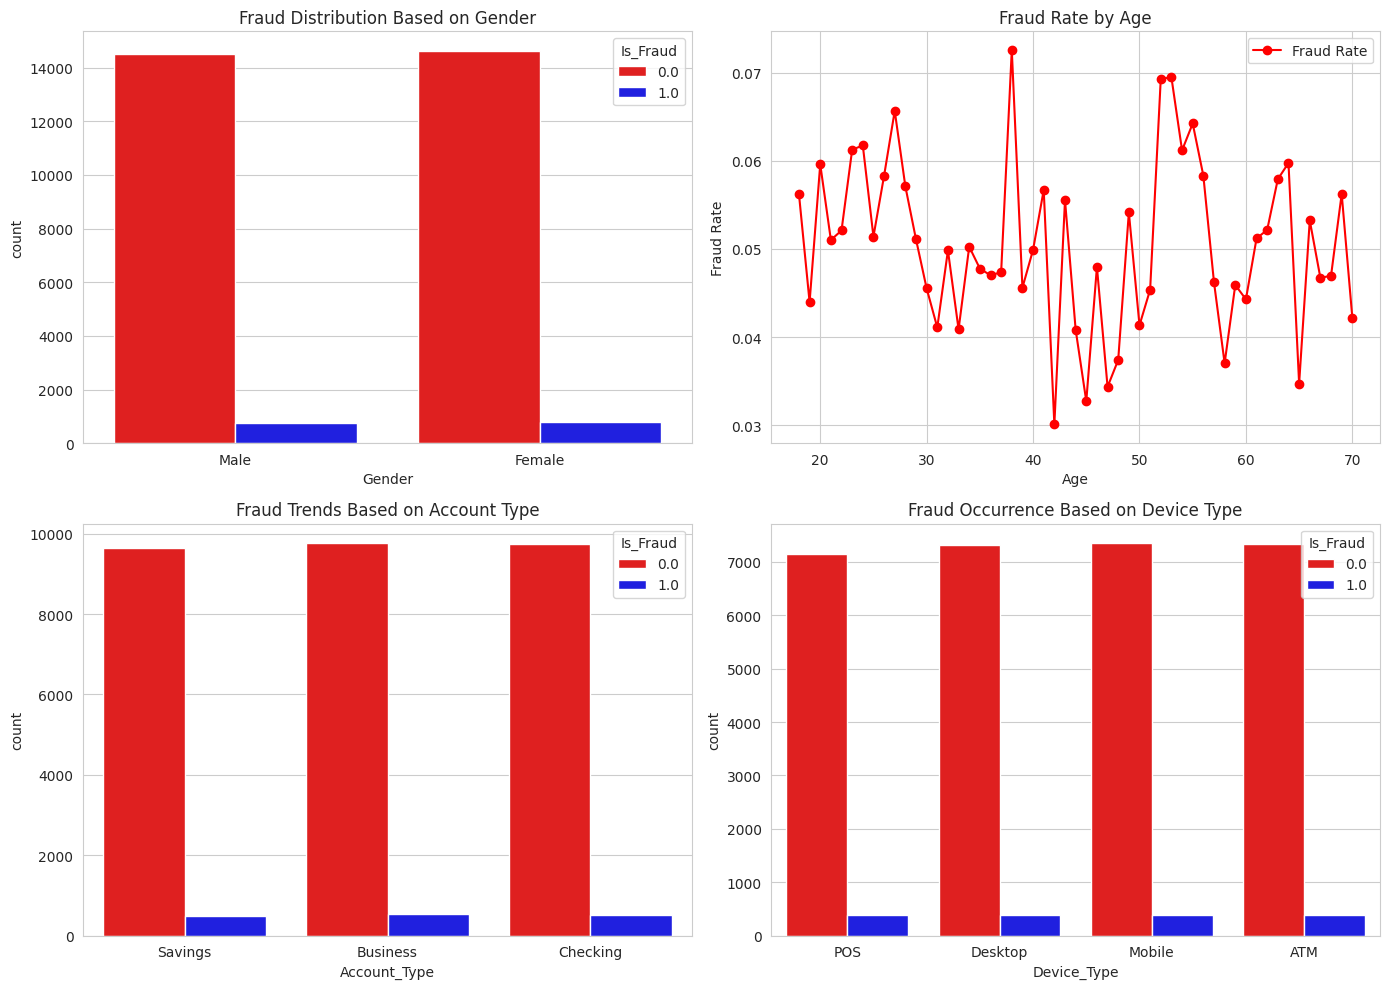

In [17]:
# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# 1. Gender vs. Is_Fraud (Countplot)
sns.countplot(ax=axes[0], x='Gender', hue='Is_Fraud', data=df, palette=['#FF0000', '#0000FF'])
axes[0].set_title('Fraud Distribution Based on Gender')

# 2. Age vs. Is_Fraud (Line Graph)
age_fraud_counts = df.groupby('Age')['Is_Fraud'].sum()  # Sum of fraud cases per age
age_total_counts = df['Age'].value_counts().sort_index()  # Total transactions per age
fraud_rate = age_fraud_counts / age_total_counts  # Fraud rate per age

axes[1].plot(fraud_rate.index, fraud_rate.values, marker='o', linestyle='-', color='red', label='Fraud Rate')
axes[1].set_title('Fraud Rate by Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Fraud Rate')
axes[1].legend()

# 3. Account Type vs. Is_Fraud (Countplot)
sns.countplot(ax=axes[2], x='Account_Type', hue='Is_Fraud', data=df, palette=['#FF0000', '#0000FF'])
axes[2].set_title('Fraud Trends Based on Account Type')

# 4. Device Type vs. Is_Fraud (Countplot)
sns.countplot(ax=axes[3], x='Device_Type', hue='Is_Fraud', data=df, palette=['#FF0000', '#0000FF'])
axes[3].set_title('Fraud Occurrence Based on Device Type')

# Adjust layout
plt.tight_layout()
plt.show()


In [18]:

# 1. Gender vs. Is_Fraud Summary Table
gender_summary = df.groupby('Gender')['Is_Fraud'].value_counts().unstack().fillna(0)
print("\n### Fraud Distribution by Gender ###\n", gender_summary)

# # 2. Age vs. Is_Fraud Summary Table
# age_fraud_counts = df.groupby('Age')['Is_Fraud'].sum()  # Total fraud cases per age
# age_total_counts = df['Age'].value_counts().sort_index()  # Total transactions per age
# fraud_rate = age_fraud_counts / age_total_counts  # Fraud rate per age

# age_summary = pd.DataFrame({
#     'Total_Transactions': age_total_counts,
#     'Fraud_Cases': age_fraud_counts,
#     'Fraud_Rate': fraud_rate
# }).fillna(0).reset_index().rename(columns={'index': 'Age'})

# print("\n### Fraud Rate by Age ###\n", age_summary.head(10))  # Print first 10 rows

# # 3. Account Type vs. Is_Fraud Summary Table
# account_summary = df.groupby('Account_Type')['Is_Fraud'].value_counts().unstack().fillna(0)
# print("\n### Fraud Trends by Account Type ###\n", account_summary)

# # 4. Device Type vs. Is_Fraud Summary Table
# device_summary = df.groupby('Device_Type')['Is_Fraud'].value_counts().unstack().fillna(0)
# print("\n### Fraud Occurrence by Device Type ###\n", device_summary)



### Fraud Distribution by Gender ###
 Is_Fraud    0.0  1.0
Gender              
Female    14625  789
Male      14528  761


In [19]:
# Group by Customer_Email to count total transactions and fraud cases
email_fraud_analysis = df.groupby("Customer_Email")["Is_Fraud"].agg(["count", "sum"])
email_fraud_analysis.rename(columns={"count": "Total_Transactions", "sum": "Fraud_Cases"}, inplace=True)

# Calculate fraud rate for each email
email_fraud_analysis["Fraud_Rate"] = email_fraud_analysis["Fraud_Cases"] / email_fraud_analysis["Total_Transactions"]

# Sort by fraud rate
email_fraud_analysis_sorted = email_fraud_analysis.sort_values(by="Fraud_Rate", ascending=False)

# Get strongest (most fraudulent) and weakest (least fraudulent) emails
strongest_email = email_fraud_analysis_sorted.iloc[0]
weakest_email = email_fraud_analysis_sorted.iloc[-1]

# Display results
print("\n### Strongest Email (Most Fraudulent) ###\n", strongest_email)
print("\n### Weakest Email (Least Fraudulent) ###\n", weakest_email)


### Strongest Email (Most Fraudulent) ###
 Total_Transactions    1.0
Fraud_Cases           1.0
Fraud_Rate            1.0
Name: unnatiXXXX@XXXXXXX.com, dtype: float64

### Weakest Email (Least Fraudulent) ###
 Total_Transactions    5.0
Fraud_Cases           0.0
Fraud_Rate            0.0
Name: lavanyaXXXXX@XXXXXX.com, dtype: float64


In [20]:
# Save the analysis results to a CSV for reference
email_fraud_analysis_sorted.to_csv("email_fraud_analysis.csv", index=True)


# Filter emails with at least 5 transactions (to avoid misleading results from very few transactions)
email_fraud_analysis_filtered = email_fraud_analysis[email_fraud_analysis["Total_Transactions"] >= 5]

# Get top 10 strongest (most fraudulent) and weakest (least fraudulent) emails
top_strongest_emails = email_fraud_analysis_sorted.head(10)
top_weakest_emails = email_fraud_analysis_sorted.tail(10)

# Display results
print("\n### Top 10 Strongest Emails (Most Fraudulent) ###\n", top_strongest_emails)
print("\n### Top 10 Weakest Emails (Least Fraudulent) ###\n", top_weakest_emails)



### Top 10 Strongest Emails (Most Fraudulent) ###
                          Total_Transactions  Fraud_Cases  Fraud_Rate
Customer_Email                                                      
unnatiXXXX@XXXXXXX.com                    1          1.0    1.000000
niteshXXXXX@XXXXXX.com                    1          1.0    1.000000
lekhaXXXX@XXXXXX.com                      1          1.0    1.000000
ryanXXXXX@XXXXXXX.com                     1          1.0    1.000000
hredhaanXXX@XXXXXXX.com                   3          2.0    0.666667
yashodaXXXXX@XXXXXX.com                   3          2.0    0.666667
keyaXXXX@XXXXXXX.com                      5          3.0    0.600000
taraXXX@XXXXX.com                         5          3.0    0.600000
ikbalXXX@XXXXXXX.com                      2          1.0    0.500000
zarnaXXX@XXXXXX.com                       2          1.0    0.500000

### Top 10 Weakest Emails (Least Fraudulent) ###
                           Total_Transactions  Fraud_Cases  Fraud_Rate

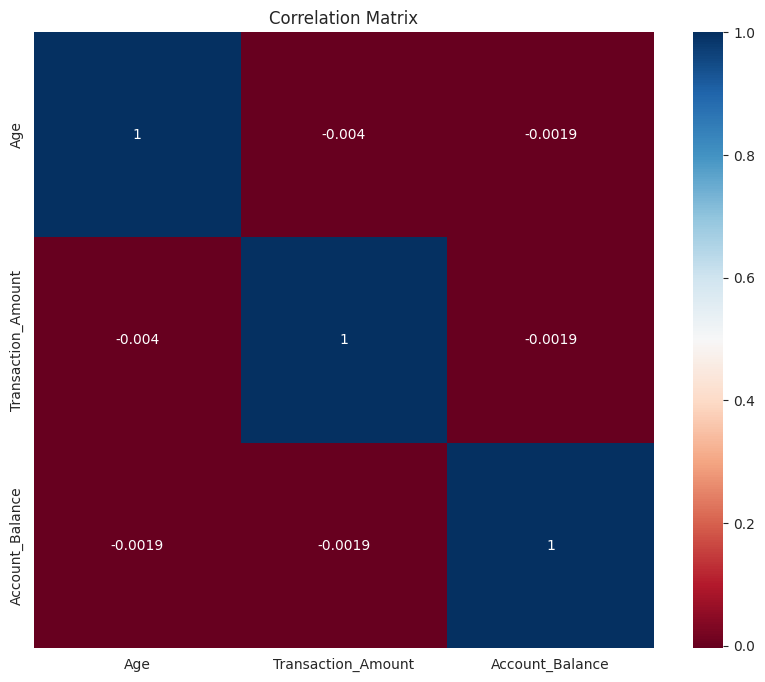

In [44]:
#Correlation for the numeric columns
corr_matrix = df_cleaned[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

## Data Preprosessing

### One hot encoding

In [45]:
# ENCODE CATEGORICAL VARIABLES
categorical_cols = ['Gender', 'Account_Type', 'Transaction_Type', 'Merchant_Category', 'Transaction_Device', 'Device_Type']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for later use

df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,1,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,2,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,5,74557.27,17,"Thiruvananthapuram, Kerala",3,0.0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,0,51,Maharashtra,Nashik,Nashik Branch,0,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,5,74622.66,9,"Nashik, Maharashtra",1,0.0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,1,20,Bihar,Bhagalpur,Bhagalpur Branch,2,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,3,66817.99,0,"Bhagalpur, Bihar",1,0.0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,0,57,Tamil Nadu,Chennai,Chennai Branch,0,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,2,58177.08,8,"Chennai, Tamil Nadu",2,0.0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,0,43,Punjab,Amritsar,Amritsar Branch,2,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,2,16108.56,16,"Amritsar, Punjab",2,0.0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


#### CONVERT DATA TYPES

In [23]:
# df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
# df['Transaction_Time'] = pd.to_datetime(df['Transaction_Time'], format='%H:%M:%S').dt.time

# df.head()

#### Scaling

In [46]:
## NORMALIZE NUMERICAL FEATURES (Scaling)
scaler = StandardScaler()
scaler.fit_transform(df[numerical_cols])
df.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,1,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,2,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,5,74557.27,17,"Thiruvananthapuram, Kerala",3,0.0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,0,51,Maharashtra,Nashik,Nashik Branch,0,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,5,74622.66,9,"Nashik, Maharashtra",1,0.0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,1,20,Bihar,Bhagalpur,Bhagalpur Branch,2,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,3,66817.99,0,"Bhagalpur, Bihar",1,0.0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,0,57,Tamil Nadu,Chennai,Chennai Branch,0,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,2,58177.08,8,"Chennai, Tamil Nadu",2,0.0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,0,43,Punjab,Amritsar,Amritsar Branch,2,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,2,16108.56,16,"Amritsar, Punjab",2,0.0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


#### TRaining the Model

In [47]:
cols_drop = ["Customer_ID", "Customer_Name", "Bank_Branch", "Transaction_ID","Transaction_Location", "Transaction_Date", "Transaction_Time", "Merchant_ID", "Customer_Contact", "Customer_Email", "State", "City", "Transaction_Currency", "Transaction_Description"]
df.drop(cols_drop, axis=1, inplace=True)
df.shape

(138160, 10)

In [50]:
# Identifying features and target variable
X = df.drop('Is_Fraud', axis=1)
y = df['Is_Fraud']

In [51]:
# Identifying numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [52]:
# Creating a Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [53]:
# Applying the preprocessing pipeline
X_processed = preprocessor.fit_transform(X)

# Displaying the shape of the processed features
print(X_processed.shape)


(138160, 9)


In [54]:
# Applying TruncatedSVD with a reduced number of components
svd = TruncatedSVD(n_components=20)  # Retain 20 components
X_svd = svd.fit_transform(X_processed)
X = pd.DataFrame(X_svd)

# Displaying the shape of the SVD transformed features
print(X.shape)

ValueError: Input X contains NaN.
TruncatedSVD does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [32]:
# Creating a Column Transformer for preprocessing
# Imputation should happen in the pipeline before SVD
# Numerical features will be imputed with the median
# Categorical features will be imputed with the most frequent value
# This is done to prevent data leakage during the train test split
numerical_pipeline = Pipeline([
    ('num_imputer', SimpleImputer(strategy='median')),
    ('num_scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),  # sparse=False for SVD
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

# Applying the preprocessing pipeline
X_processed = preprocessor.fit_transform(X)

# Displaying the shape of the processed features
print(X_processed.shape)

# Applying TruncatedSVD with a reduced number of components
svd = TruncatedSVD(n_components=20)  # Retain 20 components
X_svd = svd.fit_transform(X_processed)
X = pd.DataFrame(X_svd)

# Displaying the shape of the SVD transformed features
print(X.shape)

(30704, 9)


ValueError: n_components(20) must be <= n_features(9).

In [55]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Label Encoding

In [56]:
# Encode categorical variables using Label Encoding

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Encode categorical values
    label_encoders[col] = le  # Save encoder for future use

## Modelling

In [57]:
# TRAIN BASELINE MODEL (LOGISTIC REGRESSION)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [58]:
# Decision tree
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

# model prediction
y_pred_train2 = model2.predict(X_train)
y_pred_test2 = model2.predict(X_test)

print('Decision tree score =',round(metrics.accuracy_score(y_test, y_pred_test2)*100,2))
print(" ")
print(classification_report(y_test, y_pred_test2))

ValueError: Input y contains NaN.

In [ ]:
# rf= RandomForestClassifier(class_weight='balanced', random_state=42)

# Random Forest
model3 = RandomForestClassifier(n_estimators=100)
model3.fit(X_train, y_train)

# model prediction
y_pred_train3 = model3.predict(X_train)
y_pred_test3 = model3.predict(X_test)

# model evaluation
print('Random forest score =',round(metrics.accuracy_score(y_test, y_pred_test3)*100,2))
print(" ")
print(classification_report(y_test, y_pred_test3))

In [ ]:
### FINAL ACCURACY CHECK
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.5f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.5f}")
print(f"Decision tree score: {accuracy_score(y_test, y_pred_test2):.5f}")


In [ ]:
### FINAL ACCURACY CHECK
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.5f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.5f}")
print(f"Decision tree score: {accuracy_score(y_test, y_pred_test2):.5f}")

#### XGBoost


In [65]:
# Splitting the dataset into training and splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# calculates the class imbalance ratio and assigns it to scale_pos_weight in XGBoostClassifier
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
model = xgb.XGBClassifier(scale_pos_weight=ratio, random_state=42)
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [69]:
# Create a base XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification (fraud vs. non-fraud)
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

In [61]:
# Define preprocessing steps
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),  # Handle missing values
        ("scaler", StandardScaler())  # Normalize numerical features
    ]), numerical_cols),

    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),  # Handle missing values
        ("encoder", OneHotEncoder(handle_unknown="ignore"))  # Encode categorical features
    ]), categorical_cols)
])

In [73]:
# Define the ML Pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", xgb_model)
])

# Train the Model
y_train = y_train.fillna(y_train.mode()[0]).astype(int) #Impute missing values in y_train and convert to integers

# Retrain the pipeline
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:21:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Gender', 'Age',
                                                   'Account_Type',
                                                   'Transaction_Amount',
                                                   'Transaction_Type',
                                                   'Merchant_Category',
                                                   'Account_Balance',
                                                   'Transaction_Device',
                                                   'Device_Type']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleIm...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [79]:
# xgboost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Model Predictions
xgb_preds = xgb_model.predict(X_test)

# Evaluation
print("\n### XGBoost Model Performance ###")
print("Accuracy:", accuracy_score(y_test, xgb_preds))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:29:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



### XGBoost Model Performance ###
Accuracy: 0.9490807759119861
ROC AUC Score: 0.4999809349500496
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     26226
         1.0       0.00      0.00      0.00      1406

    accuracy                           0.95     27632
   macro avg       0.47      0.50      0.49     27632
weighted avg       0.90      0.95      0.92     27632



In [81]:
# Calculate confusion matrix after making predictions
conf_matrix = confusion_matrix(y_test, xgb_preds)

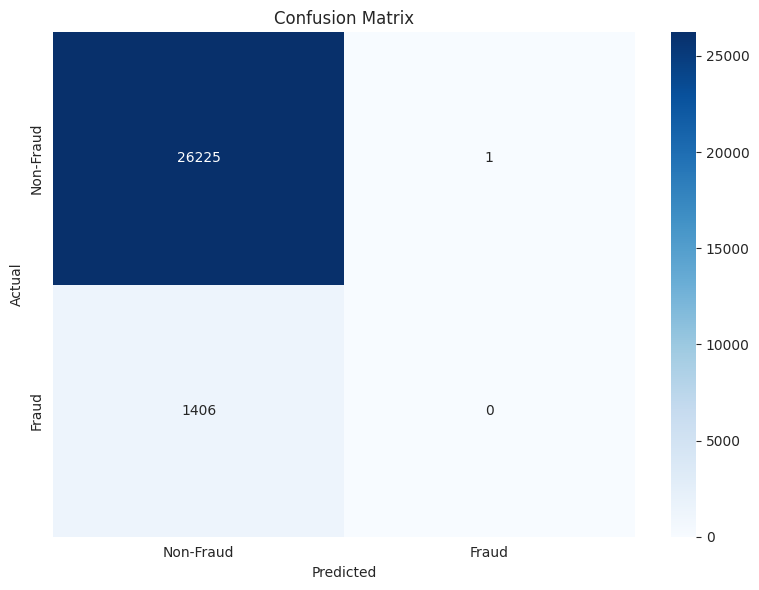

In [89]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud','Fraud'],
            yticklabels=['Non-Fraud','Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

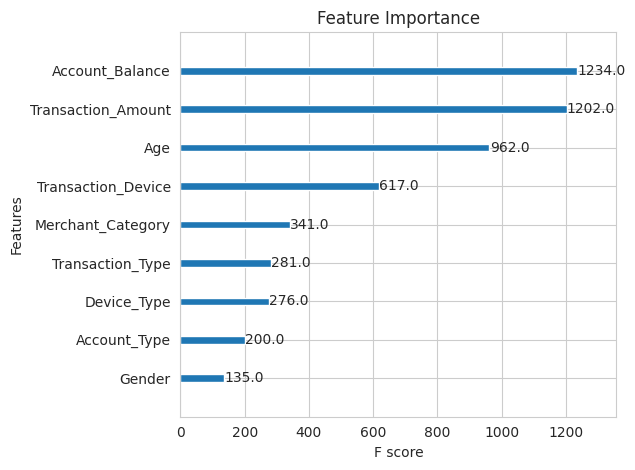

In [93]:
# To know which features contribute the most to the model's predictions
# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()
print(" ")

#### LightGBM

In [ ]:
# =================== LightGBM Model ===================
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predictions
lgb_preds = lgb_model.predict(X_test)

# Evaluation
print("\n### LightGBM Model Performance ###")
print("Accuracy:", accuracy_score(y_test, lgb_preds))
print("ROC AUC Score:", roc_auc_score(y_test, lgb_preds))
print(classification_report(y_test, lgb_preds))